Can I make one page-sized plot that contains all the interesting detail?

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
from craftroom import resample
from matplotlib import cm
from astropy.convolution import convolve, Box1DKernel

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
t1data = Table.read('../../common/quicksaves/2MASS-J23062928-0502285_basic.ecsv')
w, f, e = t1data['WAVELENGTH'], t1data['FLUX'], t1data['ERROR']

In [3]:
m1data = Table.read('saved_models/trappist-1_model_const_res_v07.ecsv')
m1w, m1f =  m1data['WAVELENGTH'], m1data['FLUX']

<AxesSubplot:>

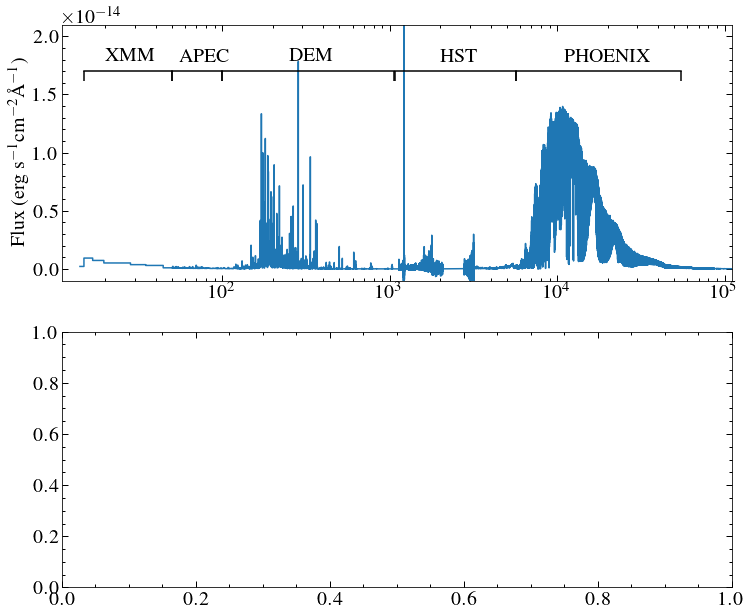

In [9]:
plt.figure(figsize=(12, 16))
plt.subplot(311)
labely = 1.7e-14
labelfac = 1.05
plt.errorbar((15,50),(labely, labely), yerr= [[0.05*labely, 0.05*labely],[0,0]], c ='k')
plt.annotate('XMM', (20, labelfac*labely))

plt.errorbar((50,100),(labely, labely), yerr= [[0.05*labely, 0.05*labely],[0,0]], c ='k')
plt.annotate('APEC', (55, labelfac*labely))

plt.errorbar((100,1060),(labely, labely), yerr= [[0.05*labely, 0.05*labely],[0,0]], c ='k')
plt.annotate('DEM', (250, labelfac*labely))

plt.errorbar((1068, 5692),(labely, labely), yerr= [[0.05*labely, 0.05*labely],[0,0]], c ='k')
plt.annotate('HST', (2000, labelfac*labely))

plt.errorbar((5692, 54963),(labely, labely), yerr= [[0.05*labely, 0.05*labely],[0,0]], c ='k')
plt.annotate('PHOENIX', (11000, labelfac*labely))


#plt.step(w[f>0], f[f>0],label ='TRAPPIST-1 (M8)', where='mid')
plt.step(w, f,label ='TRAPPIST-1 (M8)', where='mid')
plt.xscale('log')
#plt.yscale('log')
#plt.xlim(100, 1000)

#plt.xlim(90, 10000)

#ax.fill_between([0,900],0,1, facecolor='#99ccff')
#plt.annotate('X-ray/EUV: Thermosphere heating/removal', (12, 1e-22))

#ax.fill_between([900,2000],0,1, facecolor='#99ff66')

#ax.fill_between([2000,4000],0,1, facecolor='#ffff99')
#plt.annotate('FUV/NUV:\n Photochemistry', (1000, 1e-22))

#ax.fill_between([4000,60000],0,1, facecolor='#ff9933')
#plt.annotate('Visible/IR: \n Atmosphere \& surface heating', (4100, 1e-22))

plt.xlim(11, 110000)
plt.ylim(-0.1e-14, 2.1e-14)
#plt.ylim(1e-18, 0.2e-11)
#plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')


#plt.tight_layout()

plt.subplot(312)


Cross sections

In [21]:
cs_path = '/home/david/work/muscles/cross_sections/'
cs = glob.glob('{}*_cs.txt'.format(cs_path))
cs

['/home/david/work/muscles/cross_sections/CH4_cs.txt',
 '/home/david/work/muscles/cross_sections/O3_cs.txt',
 '/home/david/work/muscles/cross_sections/CO2_cs.txt',
 '/home/david/work/muscles/cross_sections/H2O_cs.txt',
 '/home/david/work/muscles/cross_sections/O2_cs.txt']

/home/david/work/muscles/cross_sections/CH4_cs.txt
/home/david/work/muscles/cross_sections/O3_cs.txt
/home/david/work/muscles/cross_sections/CO2_cs.txt
/home/david/work/muscles/cross_sections/H2O_cs.txt
/home/david/work/muscles/cross_sections/O2_cs.txt


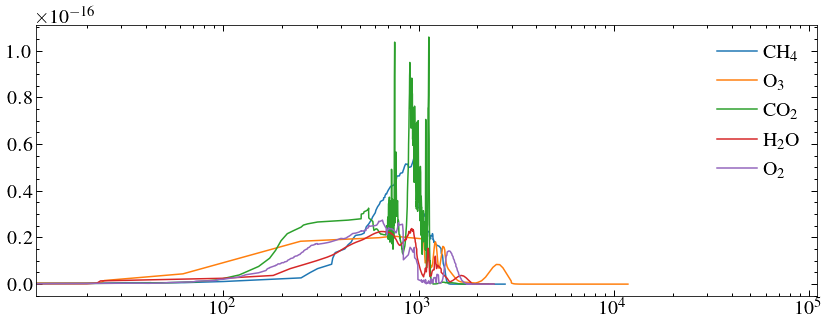

In [48]:
def make_mol_label(name): #turns molcule filenames into formated labels
    #print(name)
    label = r''
    for l in name:
        if l.isalpha():
            label +=l.upper()
        elif l.isnumeric():
            label += '$_{{{}}}$'.format(l)
    return label

for section in cs:
    print(section)
    mol = np.genfromtxt(section, names=True)
    filename = os.path.split(section)[1]
    label = make_mol_label(filename[:-7])
    molcs = convolve(mol['Total'],Box1DKernel(5))

    plt.plot(mol['Lambda'], molcs, label=labels)
    plt.legend()
    plt.xscale('log')
    #plt.yscale('log')
    #plt.ylim(1e-17)
    plt.xlim(11, 110000)